## Student performance in America

The data shows there are strong factors that affect a student's performance on a test other than just if they studied. There are factors that show which student is motivated to study based on these factors as well. The following dataset contains a student's gender, parent's education level, ethncit, and their test scores for math, reading and writing.


This is a detailed report about my findings on the performance of average American highschool student and how their environment affects their performance. The dataset has masked ethnicities to deter prior prejudice and biases.

In [203]:
### modules for analyzing data and visualizing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [204]:
data = pd.read_csv('C:/Users/hadees/Documents/programming/python_projects/Student_performance/StudentsPerformance.csv')

In [205]:
### I have chosen to drop the lunch column for a simpler analysis
### We change test preparation scores from "completed" to 1 and "none" to 0 since this will be easier to 
### work with for analysis
data.drop(['lunch'], axis=1)

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95
996,male,group C,high school,none,62,55,55
997,female,group C,high school,completed,59,71,65
998,female,group D,some college,completed,68,78,77


In [206]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [207]:
data['test preparation course']

0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test preparation course, Length: 1000, dtype: object

#### Gender vs. performance
We examine how genders perform across all catgeories with males performing about 5% better than females on average in math. On the other hand, females outscore males by a whopping 7% in reading and 9% in writing. Females perform worse in math and we hypothesize that this is due to significant outliers backed by the larger standard deviation

In [208]:
data.groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [209]:
data.groupby("gender").std()

,math score,reading score,writing score
gender,,,
female,15.491453,14.378245,14.844842
male,14.356277,13.931832,14.113832


In [210]:
female_data = data[data["gender"] == 'female']
male_data = data[data["gender"] == 'male']
female_data.head()
### seaborn will be used to visualize data
### data tables have been split for gender

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


###### Math scores
It is important to note that female sample is slightly larger

The graph below helps visualize the difference between performance as a group between genders in math. Boys are more concentrated around the mean with a smaller range and a flatter curve. Girls on the other hand also follow a normal distribution with a higher peak around the average. It can be concluded that the female average is lower due to many outliers. 

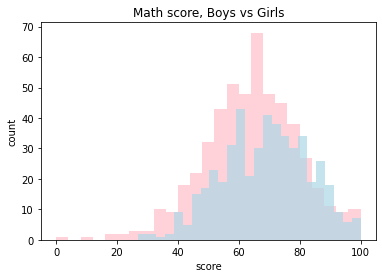

In [211]:
plt.hist(female_data["math score"], histtype='stepfilled', alpha=0.7, bins = 25, color = "pink")
plt.hist(male_data["math score"],histtype='stepfilled', alpha=0.7,  bins = 25, color = "lightblue")
plt.xlabel('score')
plt.ylabel('count')
plt.title("Math score, Boys vs Girls")
plt.show()

###### Reading score
Reading score shows females obviously perform better with a left skew distribution and "writing scores" are very similar.

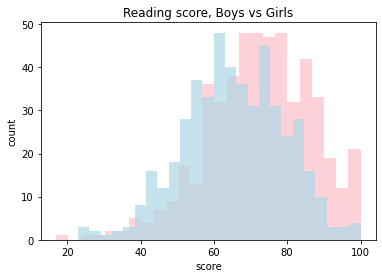

In [212]:
plt.hist(female_data["reading score"], histtype='stepfilled', alpha=0.7, bins = 25, color = "pink")
plt.hist(male_data["reading score"],histtype='stepfilled', alpha=0.7,  bins = 25, color = "lightblue")
plt.xlabel('score')
plt.ylabel('count')
plt.title("Reading score, Boys vs Girls")
plt.show()

In [213]:
data.groupby("test preparation course").mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [214]:
female_data.groupby("test preparation course").count()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
test preparation course,,,,,,,
completed,184,184,184,184,184,184,184
none,334,334,334,334,334,334,334


In [215]:
male_data.groupby("test preparation course")

In [216]:
s = data[["test preparation course","math score", "reading score", "writing score"]].groupby("test preparation course").mean()
s

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<AxesSubplot:>

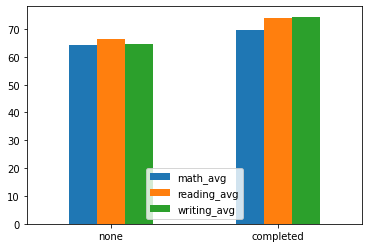

In [217]:
math_avg = s["math score"]
reading_avg = s["reading score"]
writing_avg = s["writing score"]

index = ['none', "completed"]
df = pd.DataFrame({'math_avg': math_avg,
                   'reading_avg': reading_avg, 'writing_avg': writing_avg }, index=index)
ax = df.plot.bar(rot=0)
ax

#### Conclusion on gender and homework prep
From this study, we can conclude that females on average are better students than males. about 36% of of all students completed to the test preparation course. This is true across both genders so there is another factor influencing females performing better that is not listed in the data. However those who do complete the practice perform better across all 3 categories.

doing the test preparation course results in an obvious improvement in scores as students gain knowledge and practice.